### Name: Supriya Sinha  
**Library:** Beautiful Soup  
**URL:** [https://beautiful-soup-4.readthedocs.io/en/latest/](https://beautiful-soup-4.readthedocs.io/en/latest/)  

**Description:**  
Beautiful Soup is a Python library for pulling data out of HTML and XML files.  
It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.



# LLM Encyclopedia - Web Scraping (Beautiful Soup)

This notebook demonstrates **end-to-end web scraping** of the provided `LLM2.html` encyclopedia using **Beautiful Soup 4** and **pandas**.

**What you'll learn / do:**
- Parse a local HTML file and inspect the DOM
- Use `find`, `find_all`, `select`, and advanced CSS selectors
- Navigate siblings/parents and read attributes
- Extract structured data from **tables**, **lists**, and **sections**
- Build tidy **DataFrames** and export **CSV/JSON** artifacts
- Add robust **cleaning**, **validation**, and **error handling**
- Package scrapers into reusable functions



## 1) Setup  

Before running the notebook, make sure all required libraries are installed.  
You can install them using **pip**:
pip install beautifulsoup4 pandas matplotlib


In [22]:
from bs4 import BeautifulSoup
from pathlib import Path
from typing import Any, Dict, List
import json
import matplotlib.pyplot as plt
import pandas as pd
import re

HTML_PATH = Path(r"C:\Users\hp\Desktop\LLM2.html")  # sets the file path to your local HTML file
HTML_PATH.exists(), HTML_PATH  # checks if the file exists and displays its path

(True, WindowsPath('C:/Users/hp/Desktop/LLM2.html'))


## 2) Load HTML
We'll read the HTML file and parse (to read and analyze data or text to extract useful information) it with BeautifulSoup using the built-in `html.parser`.


In [25]:
html = HTML_PATH.read_text(encoding="utf-8")
soup = BeautifulSoup(html, "html.parser")
print(soup.title.get_text(strip=True) if soup.title else "Untitled")


Large Language Models — Comprehensive Encyclopedia



## 3) Navigating the HTML Structure

After loading the HTML into BeautifulSoup, you can easily navigate and extract parts of the document using tags and attributes.  
Here are some simple examples that demonstrate how to explore the parsed HTML tree:


In [28]:
# --- Navigating the HTML Structure ---

# Access the <title> tag of the HTML document
print("Title tag:", soup.title)

# Get only the name of the tag (here, it's usually 'title')
print("Tag name:", soup.title.name)

# Get the text string inside the <title> tag
print("Title text:", soup.title.string)

# Get the parent tag of <title> (often <head>)
print("Parent tag name:", soup.title.parent.name)

# Access the first <p> tag in the document
print("First paragraph tag:", soup.p)

# Retrieve the value of the 'class' attribute of the <p> tag (if it exists)
if soup.p and soup.p.has_attr("class"):
    print("Paragraph class:", soup.p['class'])
else:
    print("No class attribute found in the first <p> tag.")

# Access the first <a> tag (link) in the document
print("First <a> tag:", soup.a)

# Find all <a> tags in the HTML (returns a list of link elements)
all_links = soup.find_all('a')
print(f"Found {len(all_links)} <a> tags:")
for link in all_links:
    print("-", link)

Title tag: <title>Large Language Models — Comprehensive Encyclopedia</title>
Tag name: title
Title text: Large Language Models — Comprehensive Encyclopedia
Parent tag name: head
First paragraph tag: <p class="lead">
        Large language models evolved from advances in neural NLP (word embeddings, sequence models) and the 2017
        <i>Transformer</i> architecture. Early milestones included GPT‑2 (2019) and GPT‑3 (2020), which popularized zero‑shot
        and few‑shot learning. Post‑2022, instruction‑tuning and RLHF enabled helpful, harmless chat assistants. From 2023–2025,
        vendors released long‑context, multimodal, and Mixture‑of‑Experts (MoE) models, with open‑weight ecosystems
        (e.g., Llama, Mistral, Qwen) accelerating innovation in research and enterprise.
      </p>
Paragraph class: ['lead']
First <a> tag: <a href="#history">History</a>
Found 21 <a> tags:
- <a href="#history">History</a>
- <a href="#catalog">Model Catalog</a>
- <a href="#openai">OpenAI — GPT fam

## 4) Quick DOM (Document Object Model) Exploration  

Some handy patterns to find elements:
- `soup.find(tag, attrs={...})` → Finds the **first** HTML element that matches the given tag and optional attributes (e.g., `soup.find('div', {'class':'header'})`).  
- `soup.find_all(...)` → Finds **all** matching elements and returns them as a list.  
- `soup.select("CSS SELECTOR")` → Uses **CSS selectors** (like `.class`, `#id`, `tag[attr=value]`) to find elements — it’s powerful and concise for complex queries.  
- `.get_text()` → Extracts only the **text content** inside an HTML tag, removing all markup.  
- `el['href']` or `el.get('href')` → Accesses the **attribute value** (like a link URL) from a tag element.  

In [31]:
# Header + subtitle
header_h1 = soup.select_one("header h1").get_text(" ", strip=True)
subtitle = soup.select_one(".subtitle").get_text(" ", strip=True)
header_h1, subtitle


('Large Language Models (LLMs) — Comprehensive Encyclopedia',
 'A Wikipedia‑style, neutral overview of major LLM families, their history, ownership, versions, capabilities, limitations, pricing (indicative), and roadmaps. Last compiled: Nov\xa01,\xa02025 . Prices and specs change often.')


## 5) Table of Contents (TOC)
The TOC is within `.toc`. We'll capture the section labels.


In [34]:
toc_items = [li.get_text(' ', strip=True) for li in soup.select('.toc ol li')]  
# Finds all <li> elements inside the table of contents (.toc ol li), extracts their text,
# removes extra spaces, and stores each section title in a list.

toc_df = pd.DataFrame({'index': range(1, len(toc_items)+1), 'section': toc_items})  
# Creates a pandas DataFrame with two columns — 'index' for numbering and 'section' for section titles.

toc_df  
# Displays the DataFrame to show the extracted table of contents.

,index,section
0,1,History
1,2,Model Catalog OpenAI — GPT family Anthropic — ...
2,3,OpenAI — GPT family
3,4,Anthropic — Claude family
4,5,Google — Gemini family
5,6,Meta — Llama family
6,7,Mistral
7,8,xAI — Grok
8,9,Cohere — Command
9,10,Alibaba — Qwen


## 6) Model Catalog — Families & Pricing
Each model family appears as an `<article id="...">` inside `#catalog`.  
Within each article, **pricing tables** are marked by `.pricing-table`.

We'll extract **all pricing rows** and annotate them with the `family` (article `id`) and the pricing section header.

In [37]:
def extract_pricing_tables(soup: BeautifulSoup) -> pd.DataFrame:
    rows = []
    for article in soup.select("#catalog article"):
        family = article.get("id", "unknown")
        for box in article.select(".pricing-table"):
            title = box.select_one("h4").get_text(" ", strip=True) if box.select_one("h4") else "Pricing"
            tbl = box.find("table")
            if not tbl: 
                continue
            headers = [th.get_text(" ", strip=True) for th in tbl.select("tr th")]
            for tr in tbl.select("tr"):
                tds = tr.find_all("td")
                if tds and len(tds) == len(headers):
                    row = {headers[i]: tds[i].get_text(" ", strip=True) for i in range(len(headers))}
                    row["family"] = family
                    row["pricing_section_title"] = title
                    rows.append(row)
    return pd.DataFrame(rows)

pricing_df = extract_pricing_tables(soup)
pricing_df.head(10)


,Model,Input,Output,Notes,family,pricing_section_title,Self-hosted,Hosted (per 1M tokens),Price,Access,Provider
0,GPT‑4.1 (latest),$30.00,$60.00,Flagship reasoning model,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
1,GPT‑4o,$5.00,$15.00,Balanced multimodal,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
2,GPT‑4 Turbo,$10.00,$30.00,"Long context, cost-effective",openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
3,GPT‑3.5 Turbo,$0.50,$1.50,Budget option,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
4,Claude 3 Opus,$15.00,$75.00,Highest intelligence,anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
5,Claude 3 Sonnet,$3.00,$15.00,Balanced performance,anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
6,Claude 3 Haiku,$0.25,$1.25,"Fast, cost-effective",anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
7,Claude 3.5 Sonnet,$3.00,$15.00,Improved reasoning,anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
8,Gemini 2.0 Ultra,$7.50,$22.50,Highest capability,google,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
9,Gemini 1.5 Pro,$3.50,$10.50,Long context specialist,google,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN



### 7.1) Clean & Normalize Pricing
We'll standardize price-like columns by removing `$` and text, converting to numeric when sensible.


In [40]:
def parse_price(cell: str) -> float | None:
    if cell is None:
        return None
    s = str(cell)
    # Pull first number like 0.50 or 15.00; supports '/1M tokens' trailing notes.
    m = re.search(r"[0-9]+(?:\.[0-9]+)?", s.replace(",", ""))
    return float(m.group(0)) if m else None

numeric_cols = []
for col in ["Input", "Output", "Price"]:
    if col in pricing_df.columns:
        numeric_cols.append(col + "_num")
        pricing_df[col + "_num"] = pricing_df[col].apply(parse_price)

pricing_df.head(15)


,Model,Input,Output,Notes,family,pricing_section_title,Self-hosted,Hosted (per 1M tokens),Price,Access,Provider,Input_num,Output_num,Price_num
0,GPT‑4.1 (latest),$30.00,$60.00,Flagship reasoning model,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,30.00,60.00,NaN
1,GPT‑4o,$5.00,$15.00,Balanced multimodal,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,5.00,15.00,NaN
2,GPT‑4 Turbo,$10.00,$30.00,"Long context, cost-effective",openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,10.00,30.00,NaN
3,GPT‑3.5 Turbo,$0.50,$1.50,Budget option,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,0.50,1.50,NaN
4,Claude 3 Opus,$15.00,$75.00,Highest intelligence,anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,15.00,75.00,NaN
5,Claude 3 Sonnet,$3.00,$15.00,Balanced performance,anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,3.00,15.00,NaN
6,Claude 3 Haiku,$0.25,$1.25,"Fast, cost-effective",anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,0.25,1.25,NaN
7,Claude 3.5 Sonnet,$3.00,$15.00,Improved reasoning,anthropic,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,3.00,15.00,NaN
8,Gemini 2.0 Ultra,$7.50,$22.50,Highest capability,google,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,7.50,22.50,NaN
9,Gemini 1.5 Pro,$3.50,$10.50,Long context specialist,google,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN,3.50,10.50,NaN



### 7.2) Example: Compare Input vs Output Token Prices (by Family)


In [43]:
# Compute simple family-level aggregates if both numeric columns exist
if {"Input_num", "Output_num"}.issubset(pricing_df.columns):
    family_stats = (pricing_df
                    .groupby("family")[["Input_num", "Output_num"]]
                    .mean(numeric_only=True)
                    .reset_index()
                    .sort_values("Input_num", ascending=True))
else:
    family_stats = pd.DataFrame()

family_stats


,family,Input_num,Output_num
3,deepseek,0.140000,0.280000
8,mistral,0.760000,2.280000
10,qwen,0.937500,1.875000
1,cohere,1.275000,6.166667
4,google,3.783333,11.350000
0,anthropic,5.312500,26.562500
9,openai,11.375000,26.625000
2,dbrx,NaN,NaN
5,ibm,NaN,NaN
6,meta,NaN,NaN


## 8) Dictionary of Key Terms
We'll parse the dictionary table under `#dictionary` into a tidy DataFrame.


In [46]:
def extract_dictionary(soup: BeautifulSoup) -> pd.DataFrame:
    rows = []
    for tr in soup.select("#dictionary table tr"):
        tds = tr.find_all("td")
        if len(tds) == 2:
            term = tds[0].get_text(" ", strip=True)
            meaning = tds[1].get_text(" ", strip=True)
            rows.append({"term": term, "meaning": meaning})
    return pd.DataFrame(rows)

dictionary_df = extract_dictionary(soup)
dictionary_df.head(10)

,term,meaning
0,LLM (Large Language Model),An AI system trained on vast text corpora to u...
1,Transformer,Neural network architecture (2017) enabling pa...
2,Tokens,"Smallest units of text processed by the model,..."
3,Context Window,The number of tokens a model can handle at once.
4,RLHF,Reinforcement Learning from Human Feedback — a...
5,Fine-tuning,Custom training of an existing model for speci...
6,Mixture of Experts (MoE),Technique where only relevant sub-networks act...
7,Multimodal,Model capable of processing multiple data type...
8,RAG,Retrieval-Augmented Generation: grounding outp...
9,Grounding,Tying responses to verified information.



## 9) Comparison Tables
There are two main comparison tables under `#compare`. We'll extract each into a DataFrame with headers intact.


In [49]:

def extract_tables_with_headers(root) -> list[pd.DataFrame]:
    out = []
    for tbl in root.select("table"):
        headers = [th.get_text(" ", strip=True) for th in tbl.select("tr th")]
        rows = []
        for tr in tbl.select("tr"):
            tds = tr.find_all("td")
            if tds and len(tds) == len(headers):
                rows.append([td.get_text(" ", strip=True) for td in tds])
        if headers and rows:
            out.append(pd.DataFrame(rows, columns=headers))
    return out

compare_root = soup.select_one("#compare")
compare_tables = extract_tables_with_headers(compare_root)
len(compare_tables), [df.shape for df in compare_tables]


(2, [(12, 7), (5, 3)])


### 10.1) Inspect the 'Model Families Overview' table


In [52]:

model_families_df = compare_tables[0].copy()
model_families_df.head()


,Family,Owner,Open weights?,Multimodal?,Long context?,Notable strengths,Common caveats
0,OpenAI GPT,OpenAI,No,Yes (4o+),Yes,"Reasoning, coding, tools","Closed, pricing shifts"
1,Anthropic Claude,Anthropic,No,Yes,Yes,"Alignment, summarization",Cost at high tiers
2,Google Gemini,Google,No,Yes,Yes,"Multimodal, Android/Workspace",API/sku churn
3,Meta Llama,Meta,Yes,Some variants,Yes,"Open/self‑host, cost control",Ops burden
4,Mistral,Mistral AI,Yes (most),Some,Good,"Efficiency, MoE",Top‑end may trail SOTA



### 10.2) Inspect the 'Indicative Use‑Case Fit' table


In [55]:

usecase_fit_df = compare_tables[1].copy()
usecase_fit_df.head()


,Use case,Well‑suited families,Notes
0,Coding copilots,OpenAI GPT‑4/4.1/4o; Anthropic Claude 3.x; Dee...,"For privacy, favor open‑weight self‑host (Llam..."
1,Long‑doc RAG,Claude 3.x; Gemini 1.5+; GPT‑4.x; Llama 3.x,Prioritize long context + good retrieval and c...
2,Multimodal (vision/audio),GPT‑4o; Gemini; Claude (vision); Llama 3.x mul...,Evaluate latency and OCR/table extraction qual...
3,On‑device/edge,Phi; Llama small; Gem‑Nano; Mistral small,Quantize to 4‑8‑bit; ensure acceptable accuracy.
4,Enterprise governance,IBM Granite; Cohere Command; Databricks DBRX; ...,"Auditability, data residency, SOC2/ISO, VPC."



## 11) Links, Headings, and Metadata
As examples of other scraping patterns:
- Extract all anchors under **References**
- Gather all `h2` and `h3` section headers for indexing


In [58]:

references = [li.get_text(" ", strip=True) for li in soup.select("#references ul li")]
h2s = [h.get_text(" ", strip=True) for h in soup.select("h2")]
h3s = [h.get_text(" ", strip=True) for h in soup.select("h3")]

len(references), references[:5], len(h2s), h2s[:5], len(h3s), h3s[:8]


(12,
 ['OpenAI (GPT) — pricing & docs',
  'Anthropic (Claude) — pricing & docs',
  'Google (Gemini) — pricing & docs',
  'Meta (Llama) — model cards & repos',
  'Mistral — releases, model cards'],
 9,
 ['Contents',
  'History',
  'Model Catalog',
  'Comparison Tables',
  'What each is good at (strengths & weaknesses)'],
 16,
 ['At a glance',
  'OpenAI — GPT family',
  'Anthropic — Claude family',
  'Google — Gemini family',
  'Meta — Llama family (open‑weight)',
  'Mistral (open‑weight & hosted)',
  'xAI — Grok',
  'Cohere — Command family'])


## 12) Packaging Reusable Scrapers
Create general functions that return dictionaries of DataFrames, making future updates easy.


In [61]:
def scrape_llm_encyclopedia(html_path: Path) -> Dict[str, Any]:
    soup = BeautifulSoup(html_path.read_text(encoding="utf-8"), "html.parser")
    out: Dict[str, Any] = {}

    # Basic metadata
    out["title"] = soup.title.get_text(strip=True) if soup.title else "Untitled"
    subtitle = soup.select_one(".subtitle")
    out["last_compiled"] = subtitle.find("b").get_text(strip=True) if subtitle and subtitle.find("b") else None

    # TOC
    out["toc"] = pd.DataFrame(
        {"index": range(1, len([*soup.select('.toc ol li')])+1),
         "section": [li.get_text(' ', strip=True) for li in soup.select('.toc ol li')]}
    )

    # Dictionary
    out["dictionary"] = extract_dictionary(soup)

    # Pricing
    out["pricing"] = extract_pricing_tables(soup)

    # Comparison tables
    compare_root = soup.select_one("#compare")
    out["comparison_tables"] = extract_tables_with_headers(compare_root) if compare_root else []

    # References
    out["references"] = [li.get_text(" ", strip=True) for li in soup.select("#references ul li")]

    return out

scraped = scrape_llm_encyclopedia(HTML_PATH)
scraped.keys(), scraped["toc"].shape, scraped["dictionary"].shape, len(scraped["comparison_tables"])


(dict_keys(['title', 'last_compiled', 'toc', 'dictionary', 'pricing', 'comparison_tables', 'references']),
 (21, 2),
 (19, 2),
 2)


## 13) Validation & Sanity Checks
We can assert expected columns and reasonable row counts to catch HTML drift.


In [63]:

assert "section" in scraped["toc"].columns and len(scraped["toc"]) >= 5
assert set(["term", "meaning"]).issubset(scraped["dictionary"].columns)
assert len(scraped["pricing"]) > 0, "No pricing rows found — check the markup."
scraped["pricing"].head(3)


,Model,Input,Output,Notes,family,pricing_section_title,Self-hosted,Hosted (per 1M tokens),Price,Access,Provider
0,GPT‑4.1 (latest),$30.00,$60.00,Flagship reasoning model,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
1,GPT‑4o,$5.00,$15.00,Balanced multimodal,openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN
2,GPT‑4 Turbo,$10.00,$30.00,"Long context, cost-effective",openai,"Pricing (per 1M tokens, indicative)",NaN,NaN,NaN,NaN,NaN


## 14) Tips: Selector Cookbook  

When working with **BeautifulSoup**, selectors help you **locate specific elements** in an HTML page.  
They act like search filters — telling BeautifulSoup *which part of the webpage to extract or analyze*.

### 🔹 Common CSS Selectors and Their Meaning

- **Select by ID:** `#dictionary`, `#catalog`  
  → Finds elements with a specific **id** attribute (e.g., `<div id="dictionary">`).

- **Select by class:** `.pricing-table`, `.toc`  
  → Finds elements with a specific **class** (e.g., `<div class="toc">`).

- **Direct descendant:** `#catalog > article`  
  → Selects `<article>` elements that are **immediate children** of `#catalog` (not nested deeper).

- **Attribute filters:** `article[id='openai']`  
  → Selects an `<article>` element whose **id** attribute equals `"openai"`.

- **Multi-level:** `#catalog article .pricing-table table tr`  
  → Selects all `<tr>` rows inside a `<table>` → within `.pricing-table` → inside `<article>` → inside `#catalog`.

- **Sibling navigation:** `el.find_next('h3')`, `el.find_previous('h2')`  
  → Moves between elements on the same level — finds the **next** `<h3>` or **previous** `<h2>` relative to another tag.

### Where These Are Used
These selectors are used **inside BeautifulSoup methods** to locate and extract HTML elements when scraping or parsing webpages.  
Examples:

```python
soup.select("#catalog > article")       # CSS selector style (selects direct child <article> elements)
soup.find("div", {"class": "pricing"})  # find() style (finds a <div> with class="pricing")
el.find_next("h3")                      # navigates to the next <h3> heading from the current element



## 15) Visualizations (Matplotlib)

Below are two simple charts built with **matplotlib** (no custom styles, each with its own figure), using the parsed pricing data:
1. **Average Input token price by family**
2. **Average Output token price by family**

> Note: We recompute the `pricing_df` from the HTML to make the cell order independent.


<Figure size 640x480 with 0 Axes>

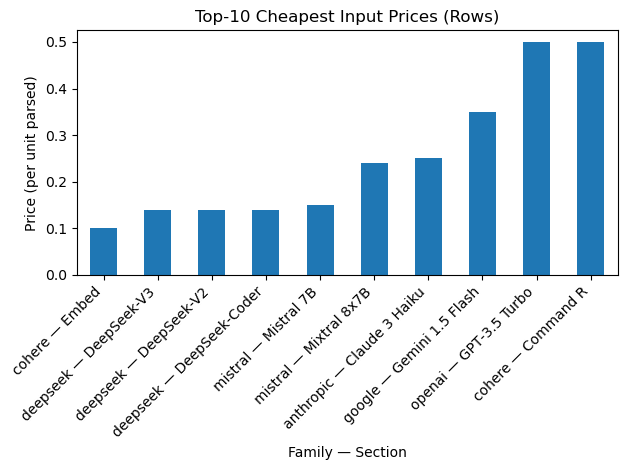

In [68]:
if "Input_num" in pricing_df.columns and pricing_df["Input_num"].notna().sum() > 0:
    top10_input = pricing_df[pricing_df["Input_num"].notna()].nsmallest(10, "Input_num").copy()
    label_col = "Model" if "Model" in top10_input.columns else "pricing_section_title"
    top10_input["label"] = top10_input["family"].astype(str) + " — " + top10_input[label_col].astype(str)

    plt.figure()
    top10_input.plot(kind="bar", x="label", y="Input_num", legend=False)
    plt.title("Top-10 Cheapest Input Prices (Rows)")
    plt.ylabel("Price (per unit parsed)")
    plt.xlabel("Family — Section")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No Input_num data available for Top-10 chart.")


<Figure size 640x480 with 0 Axes>

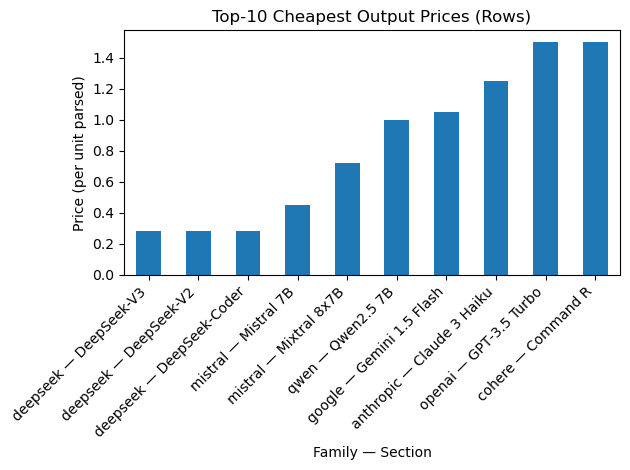

In [69]:
if "Output_num" in pricing_df.columns and pricing_df["Output_num"].notna().sum() > 0:
    top10_output = pricing_df[pricing_df["Output_num"].notna()].nsmallest(10, "Output_num").copy()
    label_col = "Model" if "Model" in top10_output.columns else "pricing_section_title"
    top10_output["label"] = top10_output["family"].astype(str) + " — " + top10_output[label_col].astype(str)

    plt.figure()
    top10_output.plot(kind="bar", x="label", y="Output_num", legend=False)
    plt.title("Top-10 Cheapest Output Prices (Rows)")
    plt.ylabel("Price (per unit parsed)")
    plt.xlabel("Family — Section")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No Output_num data available for Top-10 chart.")


## 16) Why Beautiful Soup Matters to Data Scientists

- **Data acquisition at the source:** Many datasets originate as **HTML** (docs, catalogs, leaderboards, pricing pages). Beautiful Soup lets you extract them **reliably** when CSV/JSON downloads aren't available.
- **From messy HTML to tidy tables:** Convert irregular web structures into **clean DataFrames** ready for analysis, modeling, or dashboards.
- **Fast prototyping before pipelines:** Validate hypotheses quickly, explore schemas, and define the **transformation logic** that ETL jobs will later automate.
- **Flexible selectors & resilience:** CSS selectors, attribute filters, and sibling navigation help you target **exact elements** and survive minor page layout changes.
- **End-to-end workflow fit:** Combine with `pandas` for cleaning/EDA, `matplotlib` for visuals, and schedule jobs for **repeatable** scrapes that feed analytical workflows.
